In [7]:
import numpy as np
import pandas as pd
import itertools
import random
import string
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import multiprocess



In [2]:
def create_XFR(n, t,k = 2):
    X = []
    F = []
    alphabet = string.ascii_uppercase[0:k]
    for i in range(1, n+1):    
        vals = [''.join(m) for m in itertools.product(alphabet, repeat=i)]
        X = X + vals
        if i <= t:
            F = F + vals
    
    R = {}
    react_count = 1
    for i in range(len(X)):
        cand = X[i] + X[i]
        if len(cand) <= n:
            R[react_count] = [[X[i], X[i]], [cand]]
            react_count +=1
            #Lysis Reaction
            R[react_count] = [[cand],[X[i], X[i]]]
            react_count +=1

        for j in range(i+1, len(X)):
            cand1 = X[i] + X[j]
            cand2 = X[j] + X[i]
            if len(cand1) <= n:
                if cand2 != cand1:
                    #print(list(R.values()))
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    
                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1
                    
                    if [[X[i], X[j]], [cand2]] not in list(R.values()):
                        R[react_count] = [[X[j], X[i]], [cand2]]
                        react_count +=1
                    
                    if [[cand2],[X[i], X[j]]] not in list(R.values()):
                        R[react_count] = [[cand2],[X[j], X[i]]]
                        react_count +=1
                else:
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    

                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1
    
    return(X,F, R)

In [2]:
# Needs molecule set, and number of reactions
def create_catalysts (X, react_count, p):
    C = {}
    for i in X:
        for j in range(1, react_count):
            if np.random.random(1)[0] < p:
                if j%2 == 1:
                    k = 1
                else:
                    k = -1

                if j in C.keys():
                    if i not in C[j]:
                        C[j].append(i)
                else:
                    C[j]= [i]

                if j+k in C.keys():
                    if i not in C[j+k]:
                        C[j+k].append(i)
                else:
                    C[j+k]= [i]
        

                
    return (C)

## Random Generation


In [5]:
def create_kauffman_network (n, t, p, k = 2):
    # Set of Molecules
    X = []
    F = []
    alphabet = string.ascii_uppercase[0:k]
    for i in range(1, n+1):    
        vals = [''.join(m) for m in itertools.product(alphabet, repeat=i)]
        X = X + vals
        if i <= t:
            F = F + vals

    # Reaction (pair of molecules)
    R = {}
    react_count = 1
    for i in range(len(X)):
        cand = X[i] + X[i]
        if len(cand) <= n:
            R[react_count] = [[X[i], X[i]], [cand]]
            react_count +=1
            #Lysis Reaction
            R[react_count] = [[cand],[X[i], X[i]]]
            react_count +=1

        for j in range(i+1, len(X)):
            cand1 = X[i] + X[j]
            cand2 = X[j] + X[i]
            if len(cand1) <= n:
                if cand2 != cand1:
                    #print(list(R.values()))
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    
                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1
                    
                    if [[X[i], X[j]], [cand2]] not in list(R.values()):
                        R[react_count] = [[X[j], X[i]], [cand2]]
                        react_count +=1
                    
                    if [[cand2],[X[i], X[j]]] not in list(R.values()):
                        R[react_count] = [[cand2],[X[j], X[i]]]
                        react_count +=1
                else:
                    if [[X[j], X[i]], [cand1]] not in list(R.values()):
                        R[react_count] = [[X[i], X[j]], [cand1]]
                        react_count +=1
                    

                    if [[cand1],[X[j], X[i]]] not in list(R.values()):
                        R[react_count] = [[cand1],[X[i], X[j]]]
                        react_count +=1


    C = {}
    for i in X:
        for j in range(1, react_count):
            if np.random.random(1)[0] < p:
                if j%2 == 1:
                    k = 1
                else:
                    k = -1

                if j in C.keys():
                    if i not in C[j]:
                        C[j].append(i)
                else:
                    C[j]= [i]

                if j+k in C.keys():
                    if i not in C[j+k]:
                        C[j+k].append(i)
                else:
                    C[j+k]= [i]
     

    return (X, F, R, C)

In [5]:
def graph_anlaysis (X, F, R, C):
    DG = nx.MultiDiGraph()

    for node in X:
        if node in F:
            DG.add_node(node, ncolor = "orange")
        else:
            DG.add_node(node, ncolor = 'lawngreen')

    for node in R: 
        text = "R{}".format(node)
        DG.add_node(text, ncolor = 'salmon')
        for i in range(len(R[node][0])):
            DG.add_edge(R[node][0][i], text, color = "steelblue")
        for i in range(len(R[node][1])):
            DG.add_edge(text,R[node][1][i], color ="steelblue")
    for j in C:
        for k in C[j]:
            if k in X and j in list(R.keys()):
                text = "R{}".format(j)
                DG.add_edge(k, text, color ="fuchsia")


    ## Connected Components
    out_dict = {}

    out_dict['nodes'] = DG.number_of_nodes()
    out_dict['edges'] = DG.number_of_edges()


    out_dict['SCC'] = nx.number_strongly_connected_components(DG)
    out_dict['WC'] = nx.number_weakly_connected_components(DG)

    
    if nx.is_strongly_connected(DG):
        out_dict['diameter'] = nx.diameter(DG)
    else:
        out_dict['diameter'] = 0

    
    
    out_dict ['Bet_Centrality'] = np.mean(list(nx.betweenness_centrality(DG).values()))
    out_dict['num_cycles'] = len(nx.recursive_simple_cycles(DG))
    out_dict['coloring'] = max(nx.coloring.greedy_color(DG).values())+1


    # edge_colors = []

    # for (u,v,attrib_dict) in list(DG.edges.data()):
    #     edge_colors.append(attrib_dict['color'])
    
    # node_colors = list(nx.get_node_attributes(DG, "ncolor").values())

    # nx.draw(DG, node_color= node_colors, edge_color = edge_colors, with_labels=True, font_weight='bold', node_size = 750, pos=nx.circular_layout(DG), connectionstyle='arc3, rad = 0.1')
    # plt.show()
    return out_dict



    


### RAF

In [6]:
# Find all possible molecules able to be produced by the food set and available reactions

def closure(F, R):
    no_change = 0
    X = list(F)

    while no_change !=1:
        no_change = 1

        for i in list(R.values()):
            sufficient = 1
            for j in i[0]:
                if j not in X:
                    sufficient = 0
            if sufficient == 1:
                for k in i[1]:
                    if k not in X:
                        X.append(k)
                        no_change = 0
    return(X)
            

In [7]:
def Rsupp (R):
    supp = []
    for i in list(R.values()):
        cands = i[0] + i[1]
        for j in cands:
            if j not in supp:
                supp.append(j)
    return(supp)


In [8]:
def reduceR(R, C):

    catalyzed = list(C.keys())
    uncat_R = list(set(R.keys()) - set(catalyzed))


    for i in uncat_R:
        del R[i]
    
    
    no_change = 0
    while no_change != 1:
        no_change = 1

        suppR= Rsupp(R)
        Rs = list(C.keys())

        for i in Rs:
            for j in C[i]:
                if j not in suppR:
                    C[i] = C[i].remove(j)
                
                if not C[i]:
                    # print("DELETE")
                    del C[i]
                    if i in R:
                        del R[i]
                    no_change = 0
                    break
         
    return(R,C)
            

In [9]:
def reduceToF(F, R):
    W = closure(F,R)
    r_num= list(R.keys())
    
    for i in r_num:
        remove = 0
        for j in R[i][0]:
            if j not in W:
                remove = 1
                break
        if remove == 1:
            del R[i]

    
    return R

In [10]:
def RAF(X,F,R,C):
    X_old = X.copy()
    R_old = copy.deepcopy(R)

    i = 0 
    change = 0
    while change != 1:
        R, C = reduceR(R, C)
        X = closure(F,R)
        R = reduceToF(F,R)
        i= i+1

        if R != False and X != False:
            if X_old == X and R_old == R:
                change = 1
            else:
                R_old = copy.deepcopy(R)
                X_old = X.copy()
        else:
            break
    
    if not R:
        return 0
    else:
        return 1

## Simulation

In [17]:
p_max = 1
Ns = [20,20]
ns = [2,2]
t = 2

output = []

for i in tqdm(range(len(ns))):
    ps = np.linspace(0,p_max, Ns[i])
    X,F,R = create_XFR(ns[i], t)
    for p in ps:
        C = create_catalysts(X, len(R), p)
        analysis = graph_anlaysis(X,F,R,C)
      
        raf = RAF(X.copy(),F.copy(),R.copy(),C)
        output.append([raf, ns[i], p] + list(analysis.values()))
        columns = ["RAF", "n", "p"] + list(analysis.keys())
        

df = pd.DataFrame(output, columns = columns)
df
        
    

100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


,RAF,n,p,nodes,edges,SCC,WC,diameter,Bet_Centrality,num_cycles,coloring
0,0,2,0.000000,14,24,1,1,10,0.239011,8,2
1,0,2,0.052632,14,24,1,1,10,0.239011,8,2
2,1,2,0.105263,14,28,1,1,8,0.183150,16,2
3,1,2,0.157895,14,36,1,1,8,0.164835,41,2
4,1,2,0.210526,14,50,1,1,5,0.108059,504,3
5,1,2,0.263158,14,44,1,1,6,0.132784,115,3
6,1,2,0.315789,14,52,1,1,5,0.115385,327,3
7,1,2,0.368421,14,56,1,1,5,0.100733,637,3
8,1,2,0.421053,14,58,1,1,5,0.108059,351,3
9,1,2,0.473684,14,56,1,1,5,0.097985,873,2


In [18]:
def data_gen_helper(n, p_max, N, t):
    output = []
    ps = np.linspace(0,p_max, Ns[i])
    X,F,R = create_XFR(n, t)
    for p in tqdm(ps):
        C = create_catalysts(X, len(R), p)
        analysis = graph_anlaysis(X,F,R,C)
      
        raf = RAF(X.copy(),F.copy(),R.copy(),C)
        output.append([raf, ns[i], p] + list(analysis.values()))
        columns = ["RAF", "n", "p"] + list(analysis.keys())

    return(output, columns)

In [21]:
p_max = 1
Ns = [5, 5]
ns = [2,3]
t = 2

pool = multiprocess.Pool(4)

if __name__ == '__main__':
    with pool as p:
        output = []
        vals = []
        
        for i in range(len(Ns)):
            vals = vals + [(ns[i], p_max, Ns[i], t)]
            
        for result in p.starmap(data_gen_helper, vals):

            columns = result[1]
            output = output + result[0]


    df = pd.DataFrame(output, columns = columns)
df

df.to_csv('Kauffman_Data.csv', mode='a', index=False, header=False)
        


 20%|██        | 1/5 [00:00<00:01,  3.05it/s]

KeyboardInterrupt: 

In [ ]:
df.to_csv("Kauffman_Data.csv")

In [15]:
X,F,R,C = create_kauffman_network (3, 2, 0.1, k = 2)

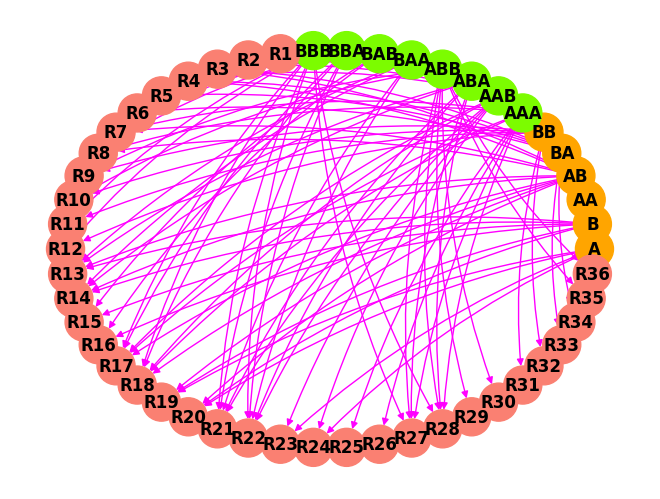

In [19]:
DG = nx.MultiDiGraph()

for node in X:
    if node in F:
        DG.add_node(node, ncolor = "orange")
    else:
        DG.add_node(node, ncolor = 'lawngreen')

for node in R: 
    text = "R{}".format(node)
    DG.add_node(text, ncolor = 'salmon')
    # for i in range(len(R[node][0])):
    #     DG.add_edge(R[node][0][i], text, color = "steelblue")
    # for i in range(len(R[node][1])):
    #     DG.add_edge(text,R[node][1][i], color ="steelblue")
for j in C:
    for k in C[j]:
        if k in X and j in list(R.keys()):
            text = "R{}".format(j)
            DG.add_edge(k, text, color ="fuchsia")

edge_colors = []

for (u,v,attrib_dict) in list(DG.edges.data()):
    edge_colors.append(attrib_dict['color'])
    
node_colors = list(nx.get_node_attributes(DG, "ncolor").values())
    
 


nx.draw(DG, node_color= node_colors, edge_color = edge_colors, with_labels=True, font_weight='bold', node_size = 750, pos=nx.circular_layout(DG), connectionstyle='arc3, rad = 0.1')
    
plt.show()

In [ ]:
graph(X,F,R,C)

In [20]:
len(list(nx.simple_cycles(DG)))

0